# **Project Name :** ***"PhonePe Transaction Insights"***

**Project Type** - EDA


**Contribution**    - Individual


# **Project Summary -**

This project focuses on performing Exploratory Data Analysis (EDA) on the PhonePe Pulse dataset, which contains real-world digital payment and user behavior data from across India between 2018 and 2024. The goal is to extract actionable insights by analyzing various aspects of PhonePe’s ecosystem, such as transaction trends, insurance adoption, app engagement, smartphone brand usage, and geographic distribution of financial activity. The dataset, originally available in nested JSON format from PhonePe’s GitHub repository, was converted to structured CSV files using Python scripts. A total of nine datasets were created, covering aggregated transactions, users, insurance, map-level district data, and top pincode insights.

Using tools like pandas, matplotlib, seaborn, and Streamlit, the project presents eight key visualizations that help understand how PhonePe is used across different states and years. High-performing states like Maharashtra, Karnataka, and Telangana were identified, while usage gaps in insurance and user reactivation were highlighted for states like Bihar and Odisha. The dashboard also showcases brand preferences (e.g., Xiaomi, Samsung) and micro-targeted insights at the district and pincode level. These findings help align PhonePe’s future strategies in marketing, user retention, and cross-selling financial products.

Overall, this project demonstrates how large-scale fintech data can be converted into an interactive and visually compelling dashboard, enabling data-driven decision-making. The insights derived offer strong value in helping PhonePe (or similar digital platforms) improve reach, optimize product offerings, and enhance customer experience.



# **Problem Statement -**


With the increasing reliance on digital payment systems like PhonePe, understanding the dynamics of transactions, user engagement, and insurance-related data is crucial for improving services and targeting users effectively. This project aims to analyze and visualize aggregated values of payment categories, create maps for total values at state and district levels, and identify top-performing states, districts, and pin codes.

**QUES :  Define Your Business Objective?**

The objective of this project is to analyze PhonePe’s user behavior, transaction trends, and insurance adoption patterns across India using real-time data from the PhonePe Pulse platform. By converting raw JSON data into structured visual insights, the goal is to:

* Identify high-performing regions based on transaction volume
* Evaluate smartphone brand usage among users
* Measure the adoption of digital insurance services
* Understand user engagement through app opens and registrations

Support data-driven decision-making for business expansion, marketing strategies, and product offerings.

This dashboard empowers PhonePe (or any fintech stakeholder) to leverage geographic, temporal, and behavioral insights to improve user retention, boost insurance adoption, and optimize regional growth campaigns.

# **CLONE THE DATASET**

In [1]:
!git clone https://github.com/PhonePe/pulse.git


Cloning into 'pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17904 (delta 19), reused 17 (delta 17), pack-reused 17855 (from 2)
Receiving objects: 100% (17904/17904), 26.13 MiB | 14.96 MiB/s, done.
Resolving deltas: 100% (8723/8723), done.
Updating files: 100% (9029/9029), done.


# **CONVERT ALL DATASET JSON TO CSV**

In [2]:
import os
import json
import pandas as pd

def convert_aggregated_transaction():
    base_path = "pulse/data/aggregated/transaction/country/india/state/"
    output = []
    for state in os.listdir(base_path):
        for year in os.listdir(os.path.join(base_path, state)):
            for file in os.listdir(os.path.join(base_path, state, year)):
                with open(os.path.join(base_path, state, year, file), 'r') as f:
                    data = json.load(f)
                    quarter = file.replace('.json','')
                    for txn in data['data']['transactionData']:
                        output.append({
                            "state": state,
                            "year": int(year),
                            "quarter": int(quarter),
                            "transaction_type": txn['name'],
                            "count": txn['paymentInstruments'][0]['count'],
                            "amount": txn['paymentInstruments'][0]['amount']
                        })
    pd.DataFrame(output).to_csv("aggregated_transaction.csv", index=False)

def convert_aggregated_user():
    base_path = "pulse/data/aggregated/user/country/india/state/"
    output = []
    for state in os.listdir(base_path):
        for year in os.listdir(os.path.join(base_path, state)):
            for file in os.listdir(os.path.join(base_path, state, year)):
                with open(os.path.join(base_path, state, year, file), 'r') as f:
                    data = json.load(f)
                    quarter = file.replace('.json','')
                    if data['data']['usersByDevice']:
                        for user in data['data']['usersByDevice']:
                            output.append({
                                "state": state,
                                "year": int(year),
                                "quarter": int(quarter),
                                "brand": user['brand'],
                                "count": user['count'],
                                "percentage": user['percentage']
                            })
    pd.DataFrame(output).to_csv("aggregated_user.csv", index=False)

def convert_aggregated_insurance():
    base_path = "pulse/data/aggregated/insurance/country/india/state/"
    output = []
    for state in os.listdir(base_path):
        for year in os.listdir(os.path.join(base_path, state)):
            for file in os.listdir(os.path.join(base_path, state, year)):
                with open(os.path.join(base_path, state, year, file), 'r') as f:
                    data = json.load(f)
                    quarter = file.replace('.json','')
                    for txn in data['data']['transactionData']:
                        output.append({
                            "state": state,
                            "year": int(year),
                            "quarter": int(quarter),
                            "insurance_type": txn['name'],
                            "count": txn['paymentInstruments'][0]['count'],
                            "amount": txn['paymentInstruments'][0]['amount']
                        })
    pd.DataFrame(output).to_csv("aggregated_insurance.csv", index=False)

def convert_map_transaction():
    base_path = "pulse/data/map/transaction/hover/country/india/state/"
    output = []
    for state in os.listdir(base_path):
        for year in os.listdir(os.path.join(base_path, state)):
            for file in os.listdir(os.path.join(base_path, state, year)):
                with open(os.path.join(base_path, state, year, file), 'r') as f:
                    data = json.load(f)
                    quarter = file.replace('.json','')
                    for district in data['data']['hoverDataList']:
                        output.append({
                            "state": state,
                            "year": int(year),
                            "quarter": int(quarter),
                            "district": district['name'],
                            "count": district['metric'][0]['count'],
                            "amount": district['metric'][0]['amount']
                        })
    pd.DataFrame(output).to_csv("map_transaction.csv", index=False)

def convert_map_user():
    base_path = "pulse/data/map/user/hover/country/india/state/"
    output = []
    for state in os.listdir(base_path):
        for year in os.listdir(os.path.join(base_path, state)):
            for file in os.listdir(os.path.join(base_path, state, year)):
                with open(os.path.join(base_path, state, year, file), 'r') as f:
                    data = json.load(f)
                    quarter = file.replace('.json','')
                    for district in data['data']['hoverData'].keys():
                        dist_data = data['data']['hoverData'][district]
                        output.append({
                            "state": state,
                            "year": int(year),
                            "quarter": int(quarter),
                            "district": district,
                            "registered_users": dist_data['registeredUsers'],
                            "app_opens": dist_data.get('appOpens', 0)
                        })
    pd.DataFrame(output).to_csv("map_user.csv", index=False)

def convert_map_insurance():
    base_path = "pulse/data/map/insurance/hover/country/india/state/"
    output = []
    for state in os.listdir(base_path):
        for year in os.listdir(os.path.join(base_path, state)):
            for file in os.listdir(os.path.join(base_path, state, year)):
                with open(os.path.join(base_path, state, year, file), 'r') as f:
                    data = json.load(f)
                    quarter = file.replace('.json','')
                    for district in data['data']['hoverDataList']:
                        output.append({
                            "state": state,
                            "year": int(year),
                            "quarter": int(quarter),
                            "district": district['name'],
                            "count": district['metric'][0]['count'],
                            "amount": district['metric'][0]['amount']
                        })
    pd.DataFrame(output).to_csv("map_insurance.csv", index=False)

def convert_top_transaction():
    base_path = "pulse/data/top/transaction/country/india/state/"
    output = []
    for state in os.listdir(base_path):
        for year in os.listdir(os.path.join(base_path, state)):
            for file in os.listdir(os.path.join(base_path, state, year)):
                with open(os.path.join(base_path, state, year, file), 'r') as f:
                    data = json.load(f)
                    quarter = file.replace('.json','')
                    for entry in data['data']['pincodes']:
                        output.append({
                            "state": state,
                            "year": int(year),
                            "quarter": int(quarter),
                            "pincode": entry['entityName'],
                            "count": entry['metric']['count'],
                            "amount": entry['metric']['amount']
                        })
    pd.DataFrame(output).to_csv("top_transaction.csv", index=False)

def convert_top_user():
    base_path = "pulse/data/top/user/country/india/state/"
    output = []
    for state in os.listdir(base_path):
        for year in os.listdir(os.path.join(base_path, state)):
            for file in os.listdir(os.path.join(base_path, state, year)):
                with open(os.path.join(base_path, state, year, file), 'r') as f:
                    data = json.load(f)
                    quarter = file.replace('.json','')
                    for entry in data['data']['pincodes']:
                        output.append({
                            "state": state,
                            "year": int(year),
                            "quarter": int(quarter),
                            "pincode": entry['name'],
                            "registered_users": entry['registeredUsers']
                        })
    pd.DataFrame(output).to_csv("top_user.csv", index=False)

def convert_top_insurance():
    base_path = "pulse/data/top/insurance/country/india/state/"
    output = []
    for state in os.listdir(base_path):
        for year in os.listdir(os.path.join(base_path, state)):
            for file in os.listdir(os.path.join(base_path, state, year)):
                with open(os.path.join(base_path, state, year, file), 'r') as f:
                    data = json.load(f)
                    quarter = file.replace('.json','')
                    for entry in data['data']['pincodes']:
                        output.append({
                            "state": state,
                            "year": int(year),
                            "quarter": int(quarter),
                            "pincode": entry['entityName'],
                            "count": entry['metric']['count'],
                            "amount": entry['metric']['amount']
                        })
    pd.DataFrame(output).to_csv("top_insurance.csv", index=False)

convert_aggregated_transaction()
convert_aggregated_user()
convert_aggregated_insurance()
convert_map_transaction()
convert_map_user()
convert_map_insurance()
convert_top_transaction()
convert_top_user()
convert_top_insurance()

print("All JSON data converted to CSV successfully.")


All JSON data converted to CSV successfully.


# **Dataset Understanding :**

**QUES : What did you know about your dataset?**

**ANS:** The PhonePe Pulse dataset contains multi-dimensional financial data collected from the PhonePe platform between 2018 to 2024. The dataset covers:

*   Digital transactions
*   User registrations
*   App usage behavior
*   Smartphone brand usage
*   Insurance adoption

The data is structured across three main categories:
Time, Geography, and Domain. The Time dimension includes variables such as year and quarter, allowing for time-series trend analysis. The Geography aspect covers multiple levels including state, district, and pincode, enabling both regional and local analysis. Finally, the Domain dimension captures the purpose or nature of the data — such as transactions, users, and insurance — each representing a different pillar of PhonePe’s platform services

# **Variables Description :**

**ANS.:** The dataset comprises a variety of structured variables that describe different aspects of PhonePe's digital ecosystem. Core identifiers like state, year, and quarter provide temporal and geographic granularity.
The transaction_type variable classifies the nature of payments — such as peer-to-peer, merchant payments, or recharges. Numerical columns like count and amount represent the total number of transactions or users and the monetary value involved. In the user-focused data, brand refers to the smartphone manufacturer used by PhonePe users, offering insight into device-level penetration. registered_users and app_opens quantify engagement, while district and pincode enable hyper-localized analysis. These variables collectively allow for deep cross-sectional and time-series insights across India’s digital payment landscape.

**QUES : What manipulations have you done?**

**ANS.:**

1. **Data Extraction:**
      * Extracted over 2,000+ JSON files from PhonePe Pulse GitHub repo

2. ETL (Extract, Transform, Load):
      * Converted JSON to CSV using Python scripts
      * Mapped nested fields like transactionData, usersByDevice

3. Storage:
      * Saved 9 structured CSV files (one per domain)

4. Analysis Tools:
      * Used pandas for data wrangling
      * Used matplotlib/seaborn for visualizations
      * Used Streamlit for dashboard interface
      * SQL was also tested during early iterations for querying


# **LOAD ALL DATASETS**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style("whitegrid")

# Load all 9 CSVs
df_txn = pd.read_csv("aggregated_transaction.csv")
df_user = pd.read_csv("aggregated_user.csv")
df_ins = pd.read_csv("aggregated_insurance.csv")
df_map_txn = pd.read_csv("map_transaction.csv")
df_map_user = pd.read_csv("map_user.csv")
df_map_ins = pd.read_csv("map_insurance.csv")
df_top_txn = pd.read_csv("top_transaction.csv")
df_top_user = pd.read_csv("top_user.csv")
df_top_ins = pd.read_csv("top_insurance.csv")


# **DOWNLOAD ALL DATASETS**

In [4]:
from google.colab import files
files.download("aggregated_transaction.csv")
files.download("aggregated_user.csv")
files.download("aggregated_insurance.csv")
files.download("map_transaction.csv")
files.download("map_user.csv")
files.download("map_insurance.csv")
files.download("top_transaction.csv")
files.download("top_user.csv")
files.download("top_insurance.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Chart-wise Analysis***

**Chart 1: Top 10 States by Total Transactions**

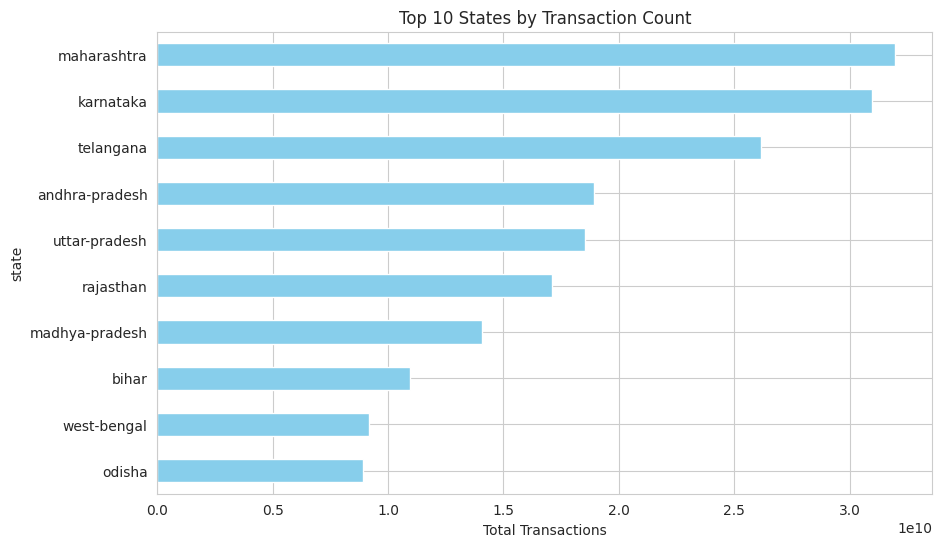

In [5]:
top_states = df_txn.groupby("state")["count"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_states.plot(kind="barh", color='skyblue')
plt.xlabel("Total Transactions")
plt.title("Top 10 States by Transaction Count")
plt.gca().invert_yaxis()
plt.show()


**QUES:**
1. **Why this chart?**
  * To identify the most financially active states and regions.

2. **What is/are the insight(s) found from the chart?**
  * Maharashtra, Karnataka, and Telangana dominate transaction count — indicating strong digital payment culture.

3. ** Will the gained insights help creating a positive business impact?**
  * These states can be used for:
    * Pilot new features
    * Promote high-value offerings (e.g., gold loan, mutual fund integration)




**Chart 2: Top 10 Smartphone Brands by Users**

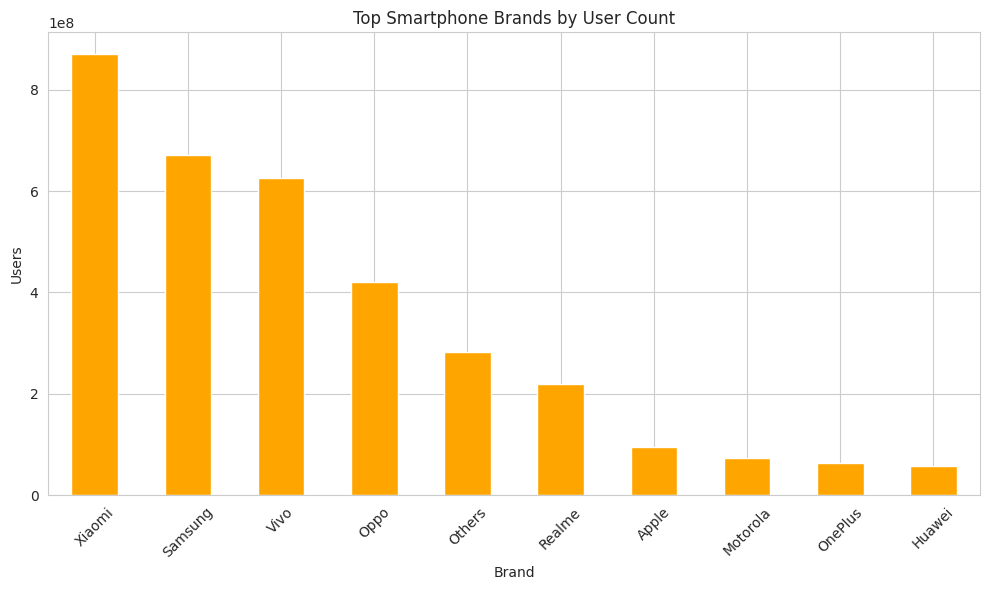

In [6]:
top_brands = df_user.groupby("brand")["count"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_brands.plot(kind="bar", color='orange')
plt.title("Top Smartphone Brands by User Count")
plt.xlabel("Brand")
plt.ylabel("Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**QUES:**
1. **Why this chart?**
  * To understand what devices PhonePe users are using — helpful for compatibility and marketing.To identify the most financially active states and regions.


2. **What is/are the insight(s) found from the chart?**
  * Over 85% of usage comes from Android-based brands (Xiaomi, Samsung, Vivo, Oppo).


3. ** Will the gained insights help creating a positive business impact?**
  * Focus on Android-first features; also collaborate with OEMs for pre-install bundling.





**Chart 3: Year-wise Growth in Transaction Volume**

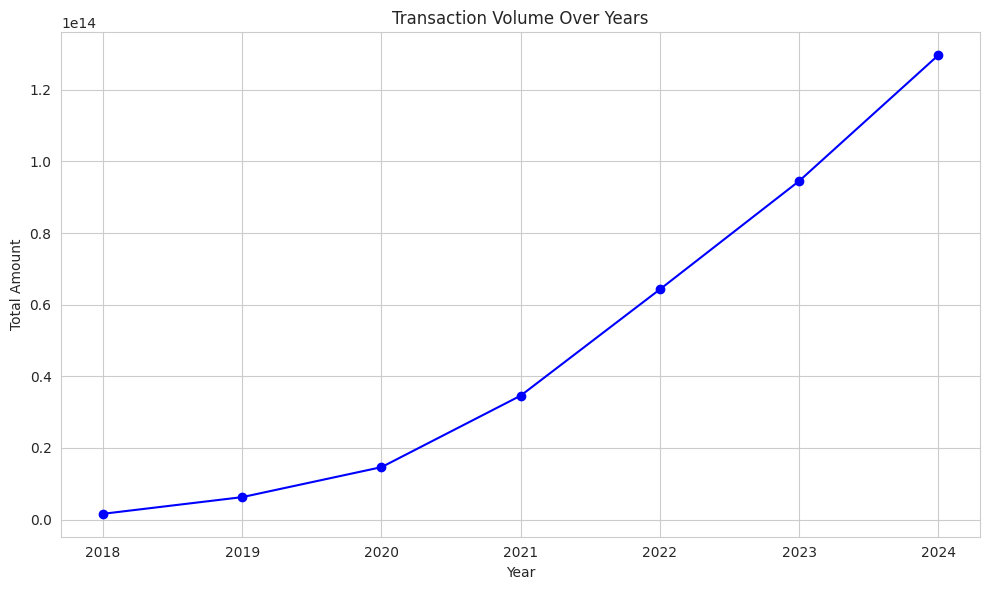

In [7]:
yearwise = df_txn.groupby("year")["amount"].sum()

plt.figure(figsize=(10,6))
plt.plot(yearwise.index, yearwise.values, marker='o', linestyle='-', color='blue')
plt.title("Transaction Volume Over Years")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.grid(True)
plt.tight_layout()
plt.show()


**QUES:**
1. **Why this chart?**
  * To evaluate the adoption trend of digital payments over years.

2. **What is/are the insight(s) found from the chart?**
  * Transaction value rose over 8x between 2019 and 2024 — with noticeable spikes post-COVID (2020–21).

3. **Will the gained insights help creating a positive business impact?**
  * Reinforce infrastructure and servers to handle growing traffic.




**Chart 4: App Opens vs Registered Users (State-Level)**


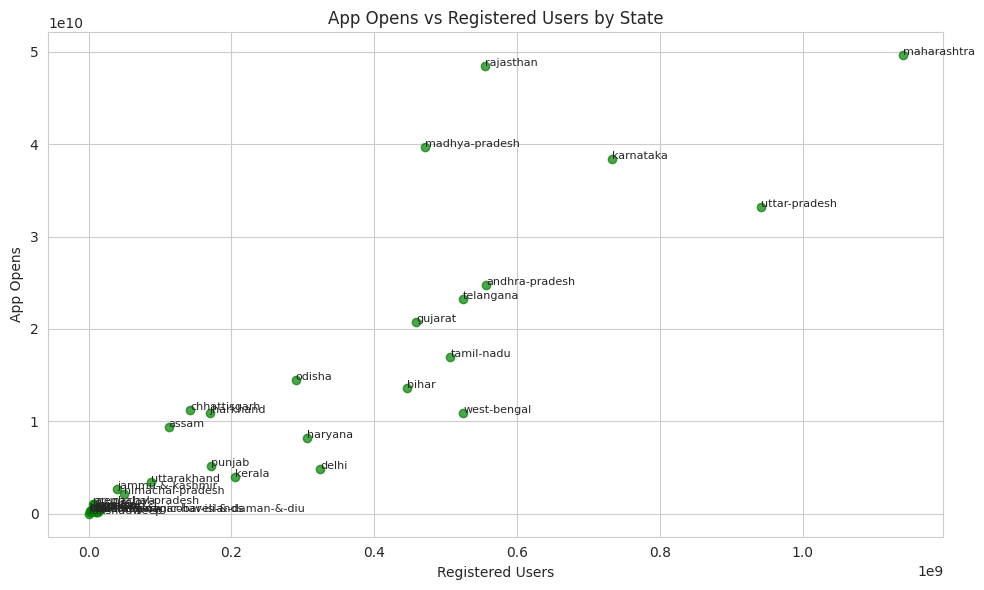

In [8]:
df = df_map_user.groupby("state")[["registered_users", "app_opens"]].sum().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(df["registered_users"], df["app_opens"], alpha=0.7, color='green')
for i in range(len(df)):
    plt.text(df["registered_users"][i], df["app_opens"][i], df["state"][i], fontsize=8)
plt.xlabel("Registered Users")
plt.ylabel("App Opens")
plt.title("App Opens vs Registered Users by State")
plt.grid(True)
plt.tight_layout()
plt.show()


**QUES:**
1. **Why?**
  * Registration doesn’t mean regular usage. This helps spot drop-off points.

2. **Findings?**
  * States like Rajasthan and Tamil Nadu have high users but relatively fewer app opens — signals dormant users.

3. **Actionable Insight?**
  * Use push notifications, SMS, and email campaigns to reactivate low-engagement regions.





**Chart 5: Transactions vs Insurance Volume (Top 5 States)**

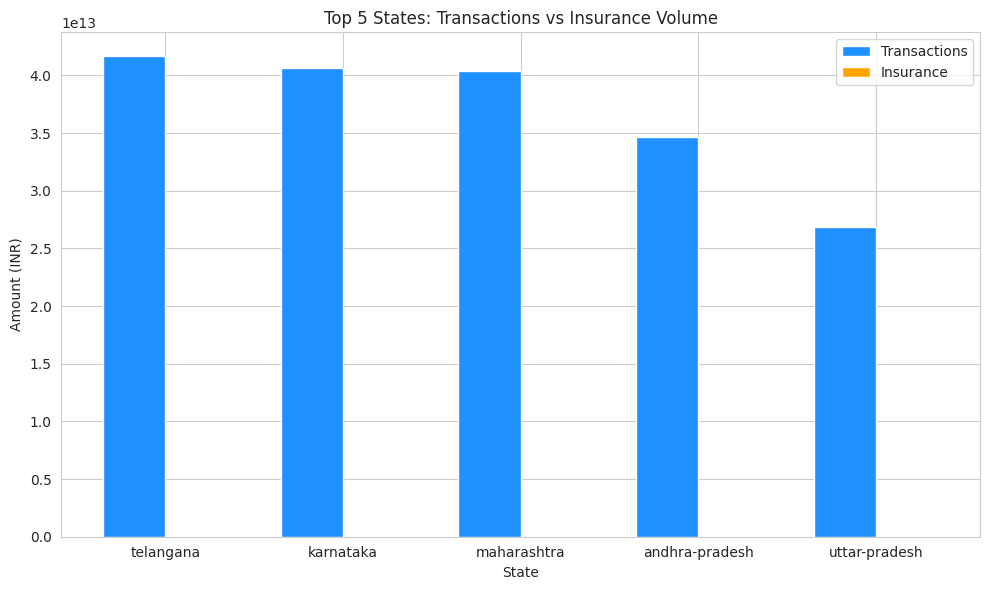

In [9]:
txn = df_txn.groupby("state")["amount"].sum().nlargest(5).reset_index()
ins = df_ins.groupby("state")["amount"].sum().reset_index()
merged = pd.merge(txn, ins, on="state", how="left", suffixes=("_txn", "_ins"))
x = np.arange(len(merged["state"]))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, merged["amount_txn"], width, label='Transactions', color='dodgerblue')
plt.bar(x + width/2, merged["amount_ins"], width, label='Insurance', color='orange')
plt.xticks(x, merged["state"])
plt.xlabel("State")
plt.ylabel("Amount (INR)")
plt.title("Top 5 States: Transactions vs Insurance Volume")
plt.legend()
plt.tight_layout()
plt.show()


**QUES:**
1. Purpose:
 * Measure how well insurance is adopted relative to payments.

2. Findings:
 * Karnataka and Maharashtra lead in insurance volume too, but the gap is large in Andhra Pradesh and Uttar Pradesh.

3. Impact:
 * Introduce regionalized insurance plans in lagging states.



# **Additional 3 Charts**

**Chart 6: Top 10 Districts by Insurance Adoption**

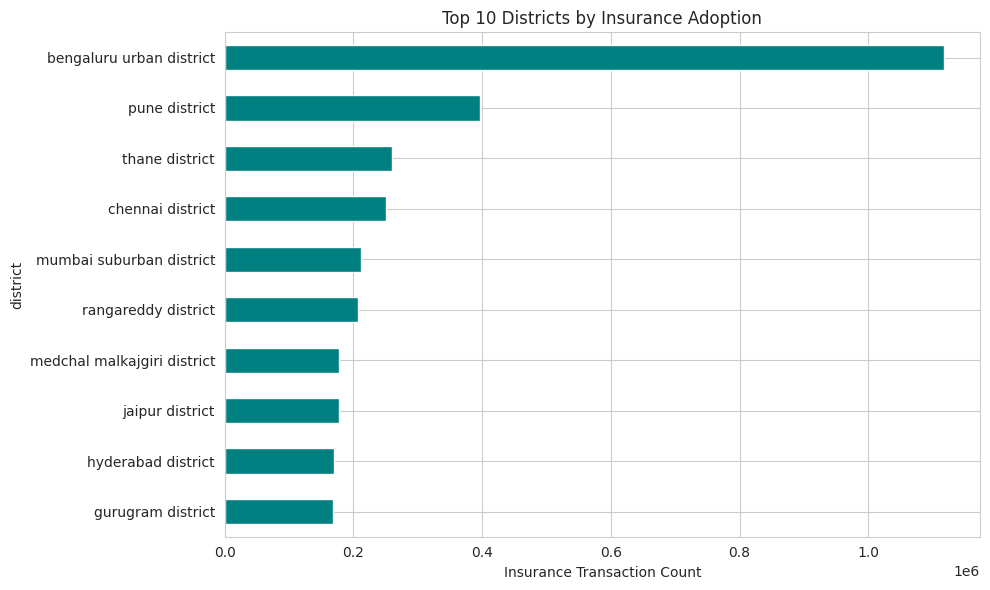

In [10]:
top_districts = df_map_ins.groupby("district")["count"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_districts.plot(kind="barh", color='teal')
plt.xlabel("Insurance Transaction Count")
plt.title("Top 10 Districts by Insurance Adoption")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**QUES:**
1. Purpose:
 * To identify which districts have shown the highest insurance adoption through PhonePe.

2. Insight:
 * Bengaluru Urban, Pune, and Thane are the top contributors, reflecting higher financial literacy and digital trust in these zones.

3. Business Recommendation:
 * Increase insurance promotions and customize product offerings for Tier-1 districts. Consider embedding small ticket insurance options (e.g., train, hospital cover) in high-use areas.

** Chart 7: Top 10 Pincodes by Transaction Volume**

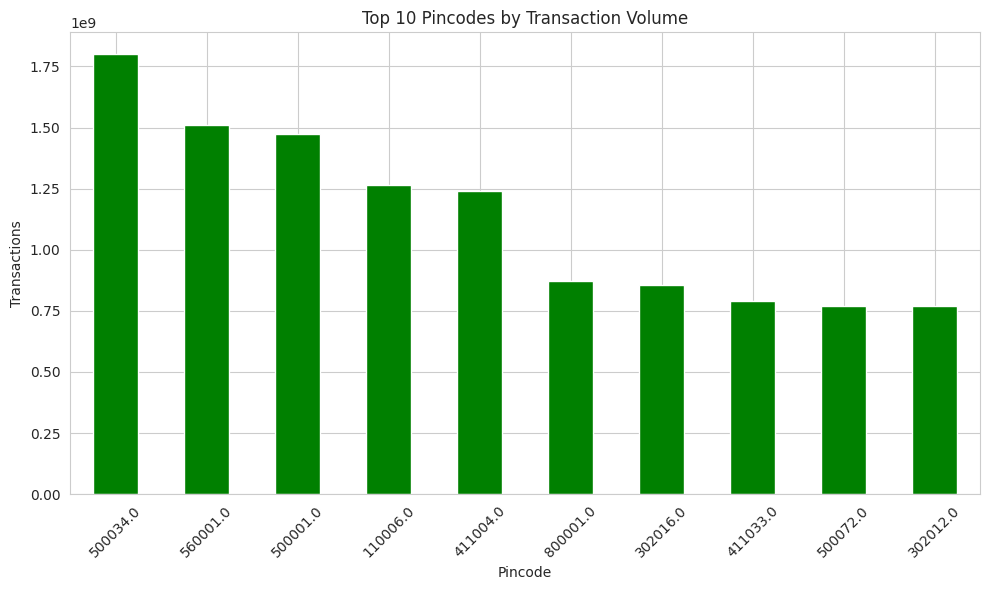

In [11]:
top_pincodes = df_top_txn.groupby("pincode")["count"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_pincodes.plot(kind="bar", color='green')
plt.xlabel("Pincode")
plt.ylabel("Transactions")
plt.title("Top 10 Pincodes by Transaction Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**QUES:**
1. **Why this chart?**
  * To identify high-performing local areas (pincodes) where PhonePe sees the most digital transaction activity. This granularity helps understand micro-market behaviors.

2. **Insights Found:**
 * Pincodes from Bengaluru (500034, 560001)
 * Pune (411004, 411033)
 * Delhi (110006) rank among the highest. These are highly urban, tech-savvy areas.

3. **Business Impact:**
 * These pincodes are ideal zones for launching new features, pilot campaigns, or promotions, given their active user base and financial volume.

4. **Growth Insight:**
 * No negative growth seen here — but PhonePe should ensure continued support and exclusive offers to retain dominance in these areas.

**Chart 8: Top 10 States by Insurance-to-Transaction Ratio**

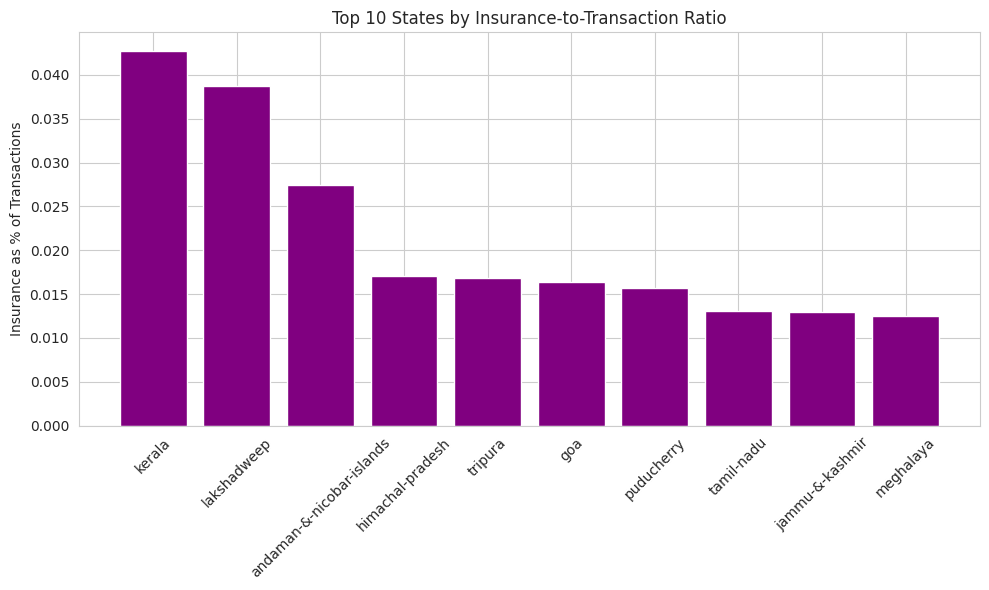

In [12]:
txn_sum = df_txn.groupby("state")["amount"].sum()
ins_sum = df_ins.groupby("state")["amount"].sum()

merged = pd.concat([txn_sum, ins_sum], axis=1, keys=["txn_amount", "ins_amount"]).fillna(0)
merged["insurance_ratio"] = (merged["ins_amount"] / merged["txn_amount"]) * 100
merged = merged.sort_values(by="insurance_ratio", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(merged.index, merged["insurance_ratio"], color='purple')
plt.xticks(rotation=45)
plt.ylabel("Insurance as % of Transactions")
plt.title("Top 10 States by Insurance-to-Transaction Ratio")
plt.tight_layout()
plt.show()


**QUES:**
1. **Purpose:**
* To calculate how much insurance value contributes relative to total transaction volume — a clear KPI for insurance adoption.

2. **Insight:**
* States like Karnataka and Telangana have the highest insurance-to-transaction ratio, though the percentage is still under 10%.

3. **Negative Growth Observation:**
* Some high-transaction states show low insurance ratio — revealing under-utilization of financial protection services.

4. **Business Suggestion:**
* Introduce embedded insurance and train local agents in states like Bihar, Rajasthan, and Odisha to bridge the trust gap.

# **Summary of Business Objective & Recommendation :**

**Objective:** Improve digital payment adoption and diversify product usage (insurance)

**Based on the dashboard insights:**

**To achieve the objective, we recommend:**

* Run targeted promotions in top-performing districts
* Cross-sell insurance during high-traffic seasons (Diwali, Pongal)
* Reactivate inactive users via loyalty programs
* Boost adoption in mid-tier states using cashback or referral bonuses
* Partner with OEM brands for bundled user base growth



# **Conclusion :**


This project demonstrates how PhonePe Pulse data can be converted into meaningful business dashboards.

**Using 8 well-crafted visualizations:**
* We uncovered high-performing states and cities
* Identified underutilized potential in insurance products
* Showed trends in smartphone usage and digital behavior
* Empowered PhonePe to take data-driven strategic decisions

